## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단, 우측하단 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
img = np.full(shape=(400, 400, 3), fill_value=255, dtype="uint8") # 400 X 400 의 흰 컬러 이미지

# image에서 (0:width, 0:height) 좌표: 좌상단 점.
# 직선 - line()
cv2.line(img, (50,50),          (200, 50), (0, 0, 255),   1)  # img배열에 직선을 그린다. 
#        배열, 시작점(가로,세로),  끝점,       선의 color, 선두께
cv2.line(img, (50,60), (150, 160), (0, 0, 128),   5, lineType=cv2.LINE_AA)

# 사각형 - rectangle()
cv2.rectangle(img, (70, 200), (180, 280), (0, 255, 0), -1 )
#         대상배열, 좌상단좌표, 우하단좌표,  color(bgr), 선두께: -1 색을 채운다.
cv2.rectangle(img, (70, 100, 110, 90), (255, 0, 0), 2)
#                  (좌상단 x, 좌상단 y, 가로길이, 세로길이)

# 원 - circle()
cv2.circle(img, (300, 100),  30,    (255, 0, 0), -1)
#       대상배열, 중심점좌표, 반지름,  color       , 선두께: -1 색을 채움
cv2.circle(img, (300, 200),  30,    (255, 0, 0), -1, lineType=cv2.LINE_AA)
cv2.circle(img, (300, 200),  50,    (255, 0, 0), 2, lineType=cv2.LINE_AA)

# 다각형 - polylines()
# 연결할 좌표들
pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts],        False, (255, 0, 255), 2)
#         대상배열, 연결할 좌표들, 폐곡점여부(시작점과 끝점을 연결할지 여부)

# 글(Text) - putText(): 영문만 가능.

text = 'Hello World 123!!'
cv2.putText(img, text, (50, 330),     cv2.FONT_HERSHEY_SIMPLEX, 1,       (0, 0, 255), 2, cv2.LINE_AA)
#                   글을 시작할 좌표, 폰트                     폰트크기  COLOR       선두께


cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lenna Image에 텍스트 그리기
Lenna Forsen

In [28]:
lenna.shape

(512, 512, 3)

In [42]:
txt = 'Lenna Forsen'
lenna = cv2.imread('images/lenna.bmp')

r = cv2.putText(lenna, txt, (160, 440), cv2.FONT_HERSHEY_COMPLEX, 
           1, # 글씨 크기
           (255,255,255),  #색
           2, # 선 두께
           cv2.LINE_AA)
# 얼굴에 box
r = cv2.rectangle(lenna, (200,200), # 좌상단
                  (370, 400),  # 우하단
                  (0, 0, 0), 2)

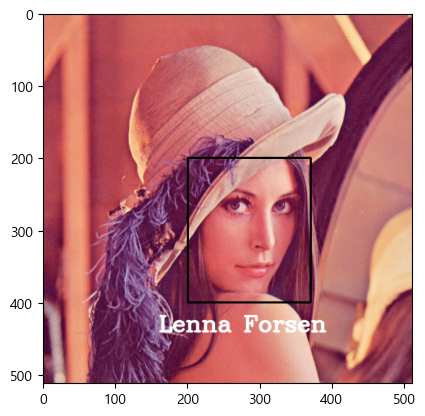

In [43]:
plt.imshow(lenna[:,:,::-1])
# plt.axis('off')

plt.show()

In [46]:
# 한글폰트 파일경로
import matplotlib as mpl
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontext='ttf')
len(font_list)
font_list[:5]

['C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\GILI____.TTF',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\GenBasB.ttf']

In [47]:
malgun_list = [f  for f in font_list if "malgun" in f.lower()]
malgun_list

['C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf']

In [53]:
# 한글출력 -> PIL 라이브러리 - pip install pillow
from PIL  import ImageFont, ImageDraw, Image

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = ImageFont.truetype(font_path, 20)  # 폰트파일 경로, 폰트크기(default:10)

img = np.full((400, 400, 3), fill_value=128, dtype='uint8')
#ndarry => PIL의 Image 객체로 변환
img_pil = Image.fromarray(img)
# print(type(img_pil))
# Image객체 그리는 기능 제공하는 객체-ImageDraw생성
draw = ImageDraw.Draw(img_pil)
# print(type(draw))
txt = "안녕하세요. Hello World123!!"

draw.text((60, 70), txt, fill=(255, 0, 0), font=font)  # (시작좌표, text, fill=색(RGB), font=폰트객체)

img2 = np.array(img_pil)  # PIL.Image객체 -> ndarray
cv2.imshow('frame', img2[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [56]:
img = cv2.imread('images/lenna.bmp')
print(img.shape)
img_crop = img[200:400, 200:370]  #[0축: height, 1축: width]
print(img_crop.shape)

(512, 512, 3)
(200, 170, 3)


In [57]:
cv2.imshow('frame', img)
cv2.waitKey(0)

cv2.imshow('frame', img_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
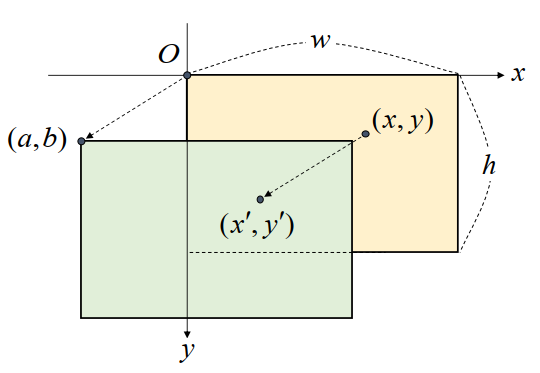

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$



- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderMode: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. (B, G, R) 로 지정

In [64]:
import cv2
import numpy as np

a, b = 200, 100   # a: 좌우 변환크기, b: 상하 변환 크기
aff_matrix = np.array([[1, 0, a],
                       [0, 1, b]], dtype='float32')

img = cv2.imread('images/lenna.bmp')
# result_img = cv2.warpAffine(img, # 대상이미지배열
#                            aff_matrix, # 변환 행렬. 대상이미지의 좌표에 행렬곱해줄 행렬 ==> 새로운 좌표 생성
#                            (0, 0) # dsize-변환후 이미지 크기 (0, 0): 원본과 동일한 크기.
#                            )

result_img = cv2.warpAffine(img, aff_matrix, (0, 0), 
#                             borderMode=cv2.BORDER_REPLICATE
#                              borderMode=cv2.BORDER_REFLECT
                             borderMode=cv2.BORDER_WRAP
                           )


cv2.imshow('원본', img)
cv2.imshow(f'a:{a}, b:{b}', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
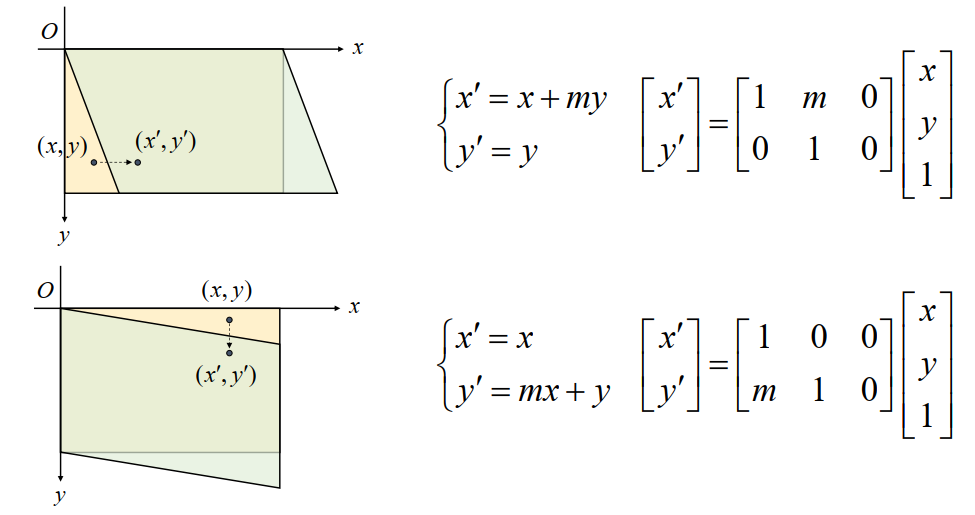
<center>m: 비율</center>

In [71]:
img.shape[1], img.shape[0]

(512, 512)

In [72]:
x_rate, y_rate = 0.1, 0.3
aff_matrix_shear = np.array([[1, x_rate, 0],        # X축만 변환
                             [y_rate, 1,    0]], dtype='float32')    # Y축만 변환

width, height =  img.shape[1], img.shape[0] #원본 이미지의 너비, 높이
new_width = width + int(height*x_rate)
new_height = height + int(width*y_rate)


result_img2 = cv2.warpAffine(img, aff_matrix_shear, (new_width, new_height))   #(0, 0))

cv2.imshow('frame', result_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법(INTER_LINEAR)을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

(320, 480, 3)


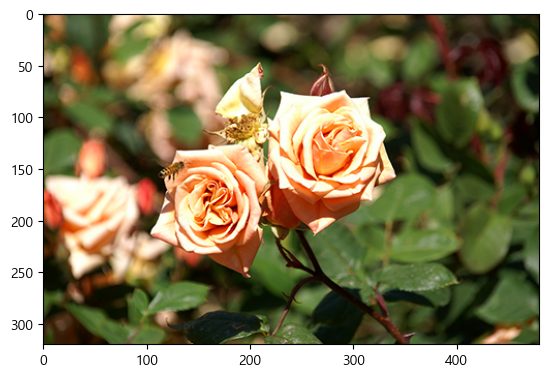

In [75]:
img = cv2.imread('images/rose.bmp')
print(img.shape)
plt.imshow(img[:,:,::-1])
plt.show()

In [79]:
height, width = img.shape[:2]
small_size = int(width*0.5), int(height*0.5)
big_size = int(width*2), int(height*2)
print('small:', small_size)
print('big', big_size)

small: (240, 160)
big (960, 640)


In [82]:
result_small = cv2.resize(img, # 원본 이미지
                         dsize=small_size, # resize할 크기 (width, height)
                         interpolation=cv2.INTER_AREA) # DOWN SAMPLING(축소)

In [91]:
result_big1 = cv2.resize(img, # 원본 이미지
                         dsize=big_size, # resize할 크기 (width, height)
                         interpolation=cv2.INTER_NEAREST)
result_big2 = cv2.resize(img, # 원본 이미지
                         dsize=big_size, # resize할 크기 (width, height)
                         interpolation=cv2.INTER_LINEAR)
result_big3 = cv2.resize(img, # 원본 이미지
                         dsize=big_size, # resize할 크기 (width, height)
                         interpolation=cv2.INTER_CUBIC)
result_big4 = cv2.resize(img, # 원본 이미지
                         dsize=big_size, # resize할 크기 (width, height)
                         interpolation=cv2.INTER_LANCZOS4)

In [92]:
# cv2.imshow('frame1', img)
# cv2.imshow('small', result_small)
cv2.imshow('big_nearest', result_big1)
cv2.imshow('big_linear', result_big2)
cv2.imshow('big_cubic', result_big2)
cv2.imshow('big_lanczos4', result_big3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [94]:
result = cv2.resize(img, dsize=(0,0), fx=0.5, fy=1.2, interpolation=cv2.INTER_AREA)
cv2.imshow('frame', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


In [95]:
img = cv2.imread('images/lenna.bmp')
result_1 = cv2.flip(img, 1)  #양수: 좌우
result_2 = cv2.flip(img, 0)  #0 : 상하
result_3 = cv2.flip(img, -1) #음수 : 좌우/상하

cv2.imshow('src', img)
cv2.imshow('pos', result_1)
cv2.imshow('0', result_2)
cv2.imshow('neg', result_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 회전(Rotate)
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - **ROTATE_90_CLOCKWISE**: 시계방향 90도
            - **ROTATE_180**: 180도 회전
            - **ROTATE_90_COUNTERCLOCKWISE**: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - **warpAffine()**을 이용해 회전 처리
    - **getRotationMatrix2D(center, angle, scale)**
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도(양수: 반시계방향, 음수: 시계방향)
        - scale: 이미지 확대 및 축소 비율
    - **warpAffine(src, M, dsize)**
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

In [96]:
img = cv2.imread('images/lenna.bmp')
# rotate - 90도 간격으로만 회전.
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)  #시계방향 90도
img_180 = cv2.rotate(img, cv2.ROTATE_180)
img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향 90도

cv2.imshow('90', img_90)
cv2.imshow('180', img_180)
cv2.imshow('270', img_270)
cv2.waitKey(0)
cv2.destroyAllWindows()

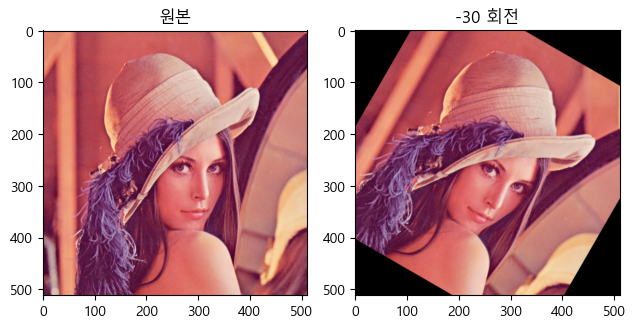

In [107]:
# 원하는 각도만큼 회전 - getRotationMatrix2D(): 변환 행렬을 조회 -> warpAffine()을 이용해서 회전처리.
angle = -30 # 회전 각도 (양수: 시계 반대, 음수: 시계 방향)
height, width = img.shape[:2]
center_coor = int(width/2), int(height/2)  # 이미지 중심의 X, Y 좌표 => 튜플
# center_coor = (10,10)

rotate_matrix = cv2.getRotationMatrix2D(center_coor, #회전축 좌표
                                         angle,
                                         1  # 회전후 이미지 크기변경(Frame-액자를 키우는게 아님.) -> 원본 대비 비율로 설정.
                                       )
# print(rotate_matrix)
result = cv2.warpAffine(img, rotate_matrix, (0,0))

plt.subplot(1,2,1)
plt.imshow(img[:, :, ::-1])
plt.title('원본')

plt.subplot(1,2,2)
plt.imshow(result[:, :, ::-1])
plt.title(f"{angle} 회전")

plt.tight_layout()
plt.show()

In [ ]:
tensorflow